In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import numpy as np

In [24]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
train_data = train_data.reshape(-1, 784).astype('float32') / 255.0
test_data = test_data.reshape(-1, 784).astype('float32') / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
model = Sequential([
    layers.InputLayer(input_shape=(784,)),
    layers.Dense(128, activation='relu', name='l1'),
    layers.Dense(64, activation='relu', name='l2'),
    layers.Dense(10, activation='softmax', name='l3')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [26]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ l1 (Dense)                      │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l2 (Dense)                      │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l3 (Dense)                      │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_data, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8818 - loss: 0.4173
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9677 - loss: 0.1043
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9786 - loss: 0.0696
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9831 - loss: 0.0512
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9881 - loss: 0.0377


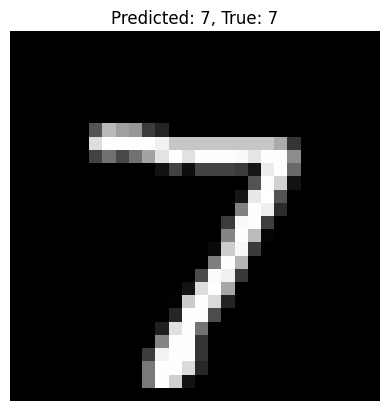

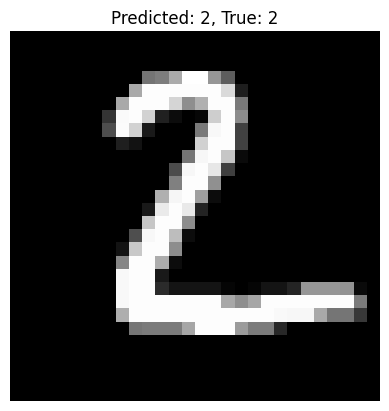

In [28]:
import matplotlib.pyplot as plt

sample_images = test_data[:2]
sample_labels = test_labels[:2]

logits = model(sample_images)
probabilities = tf.nn.softmax(logits)

for i in range(2):
    predicted_class = np.argmax(probabilities[i].numpy())
    true_class = sample_labels[i]
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_class}, True: {true_class}")
    plt.axis('off')
    plt.show()